# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []
latl = []
lonl = []

# Empty list for holding the cities names
cities = []
country_cd = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    cntry_cd = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        country_cd.append(cntry_cd)
        latl.append(lat_lng[0])
        lonl.append(lat_lng[1])

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
latn = [i for n, i in enumerate(latl) if i not in latl[:n]]
lonn = [i for n, i in enumerate(lonl) if i not in lonl[:n]]

Number of cities in the list: 576


In [34]:
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&lat={latl[0]}&lon={lonl[0]}"
city_weather = requests.get(url).json()


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [59]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&lat={latn[i]}&lon={lonn[i]}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        ktemp = city_weather["main"]["temp_max"]
        city_max_temp = round((ktemp - 273.15) * 9/5 + 32)
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = country_cd[i]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except None:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | kristiansund
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | ihosy
Processing Record 10 of Set 1 | vadso
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | nabire
Processing Record 13 of Set 1 | beira
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | borogontsy
Processing Record 16 of Set 1 | ugu
Processing Record 17 of Set 1 | nadym
Processing Record 18 of Set 1 | kongsvinger
Processing Record 19 of Set 1 | san patricio
Processing Record 20 of Set 1 | valparaiso
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | edinburgh of the seven seas


Processing Record 44 of Set 4 | lethem
Processing Record 45 of Set 4 | cox's bazar
Processing Record 46 of Set 4 | coahuayana de hidalgo
Processing Record 47 of Set 4 | suoyarvi
Processing Record 48 of Set 4 | thunder bay
Processing Record 49 of Set 4 | kilindoni
Processing Record 0 of Set 5 | mitu
Processing Record 1 of Set 5 | puerto san carlos
Processing Record 2 of Set 5 | tura
Processing Record 3 of Set 5 | college
Processing Record 4 of Set 5 | buala
Processing Record 5 of Set 5 | keflavik
Processing Record 6 of Set 5 | toliara
Processing Record 7 of Set 5 | jamestown
Processing Record 8 of Set 5 | karratha
Processing Record 9 of Set 5 | alotau
Processing Record 10 of Set 5 | lompoc
Processing Record 11 of Set 5 | ridgecrest
Processing Record 12 of Set 5 | muborak
Processing Record 13 of Set 5 | saipan
Processing Record 14 of Set 5 | pingyin
Processing Record 15 of Set 5 | egilsstadir
Processing Record 16 of Set 5 | chinde
Processing Record 17 of Set 5 | sioux center
Processing R

Processing Record 42 of Set 8 | urangan
Processing Record 43 of Set 8 | markovo
Processing Record 44 of Set 8 | greater sudbury
Processing Record 45 of Set 8 | berrouaghia
Processing Record 46 of Set 8 | simanggang
Processing Record 47 of Set 8 | campbellton
Processing Record 48 of Set 8 | teguise
Processing Record 49 of Set 8 | praia da vitoria
Processing Record 0 of Set 9 | murzuq
Processing Record 1 of Set 9 | hammerfest
Processing Record 2 of Set 9 | nizhnesortymskiy
Processing Record 3 of Set 9 | bayan nur
Processing Record 4 of Set 9 | tasbuget
Processing Record 5 of Set 9 | horta
Processing Record 6 of Set 9 | tobol
Processing Record 7 of Set 9 | itoman
Processing Record 8 of Set 9 | forbesganj
Processing Record 9 of Set 9 | vadodara
Processing Record 10 of Set 9 | gulf shores
Processing Record 11 of Set 9 | kutiyana
Processing Record 12 of Set 9 | pontes e lacerda
Processing Record 13 of Set 9 | cooper's town
Processing Record 14 of Set 9 | porto seguro
Processing Record 15 of 

In [60]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [61]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-16.4174,91.1264,77,65,100,7.51,cc,1682651218
1,kristiansund,72.9592,4.7263,39,88,100,2.39,no,1682651219
2,thompson,73.5361,-94.0874,12,93,100,6.18,ca,1682651219
3,grytviken,-70.8250,-29.1822,24,97,100,2.90,gs,1682651219
4,waitangi,-49.0805,-171.0479,48,65,100,12.51,nz,1682651219


In [62]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [63]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-16.4174,91.1264,77,65,100,7.51,cc,1682651218
1,kristiansund,72.9592,4.7263,39,88,100,2.39,no,1682651219
2,thompson,73.5361,-94.0874,12,93,100,6.18,ca,1682651219
3,grytviken,-70.8250,-29.1822,24,97,100,2.90,gs,1682651219
4,waitangi,-49.0805,-171.0479,48,65,100,12.51,nz,1682651219


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

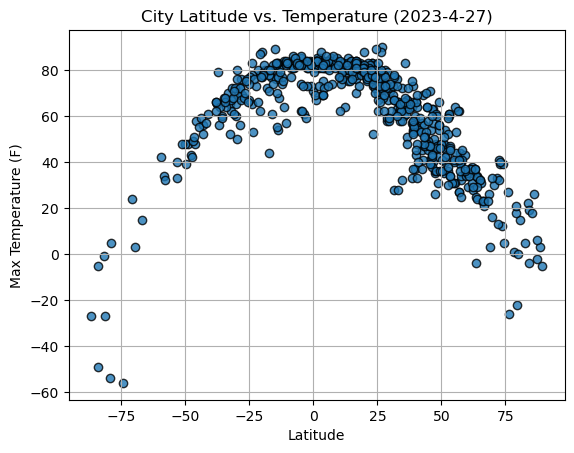

In [64]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2023-4-27)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

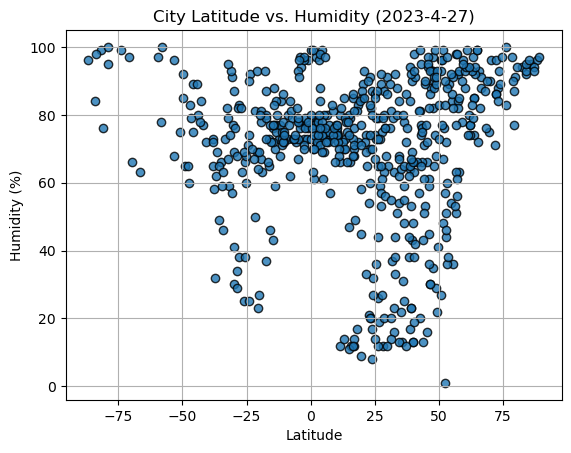

In [65]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-4-27)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

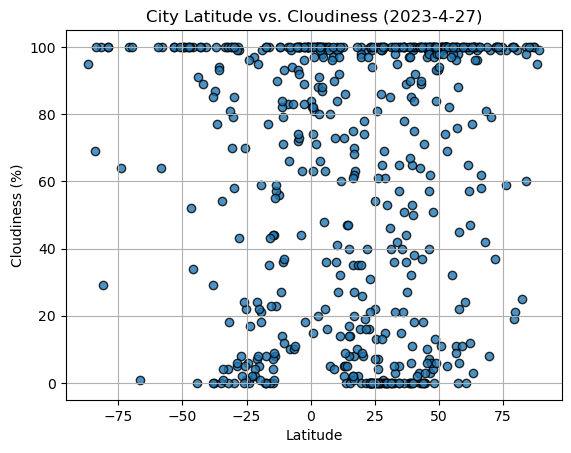

In [66]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-4-27)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

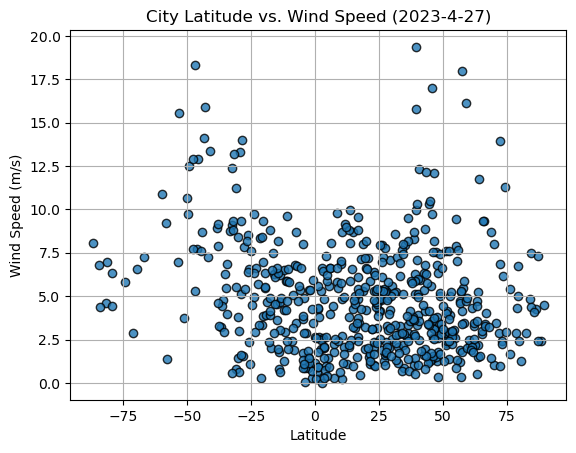

In [67]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-4-27)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [96]:
# Define a function to create Linear Regression plots
def linregplt(x,y):
    res = linregress(x,y)
    print(f"The r value is {res.rvalue}")
    plt.scatter(x, y, label='original data')
    plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
    plt.legend()
    plt.show()

In [97]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
nhemi = city_data_df[city_data_df["Lat"] >= 0]
northern_hemi_df = pd.DataFrame(nhemi)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kristiansund,72.9592,4.7263,39,88,100,2.39,no,1682651219
2,thompson,73.5361,-94.0874,12,93,100,6.18,ca,1682651219
7,wailua homesteads,26.2802,-172.4538,69,65,4,7.93,us,1682651220
9,vadso,70.5794,28.6573,30,96,79,3.45,no,1682651220
10,isafjordur,79.3946,-34.5441,-22,77,19,6.71,is,1682651220


In [98]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
shemi = city_data_df[city_data_df["Lat"] < 0]
southern_hemi_df = pd.DataFrame(shemi)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-16.4174,91.1264,77,65,100,7.51,cc,1682651218
3,grytviken,-70.8250,-29.1822,24,97,100,2.90,gs,1682651219
4,waitangi,-49.0805,-171.0479,48,65,100,12.51,nz,1682651219
5,port-aux-francais,-69.5218,69.1178,3,66,100,6.58,tf,1682651219
6,blackmans bay,-74.1042,140.2858,-56,99,64,5.84,au,1682651220


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.8903310244553158


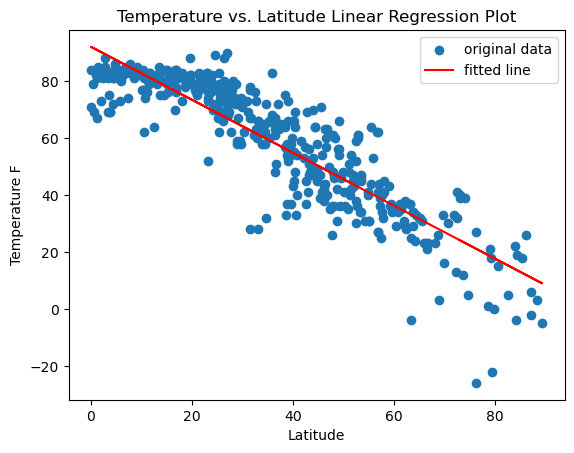

In [99]:
# Linear regression on Northern Hemisphere
plt.title("Temperature vs. Latitude Linear Regression Plot")
plt.ylabel("Temperature F")
plt.xlabel("Latitude")
linregplt(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])


The r value is 0.8525325921408573


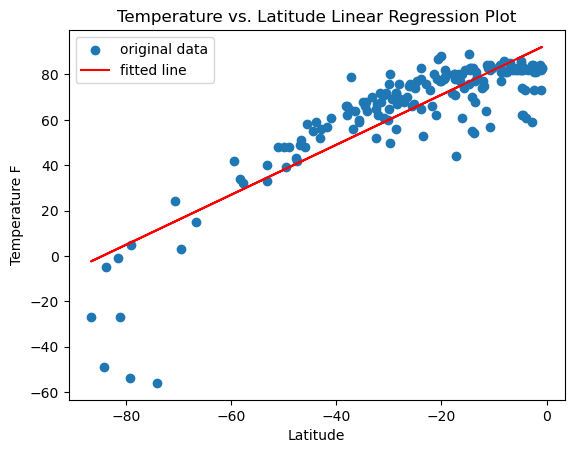

In [100]:
# Linear regression on Southern Hemisphere
plt.title("Temperature vs. Latitude Linear Regression Plot")
plt.ylabel("Temperature F")
plt.xlabel("Latitude")
linregplt(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** There is a common trend that as the latitude gets closer to 0, the maximum temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r value is 0.20512517712312853


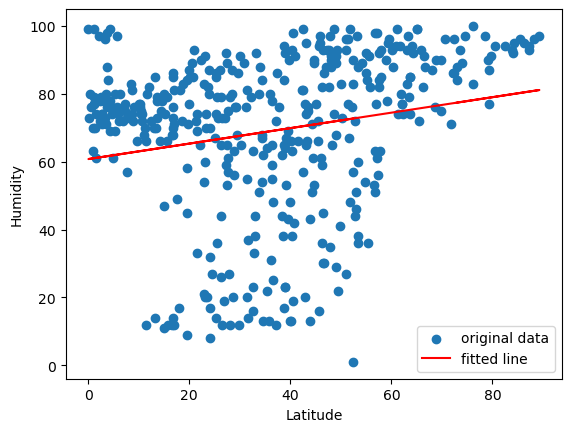

In [101]:
# Northern Hemisphere
plt.ylabel("Humidity")
plt.xlabel("Latitude")
linregplt(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

The r value is -0.115404503569782


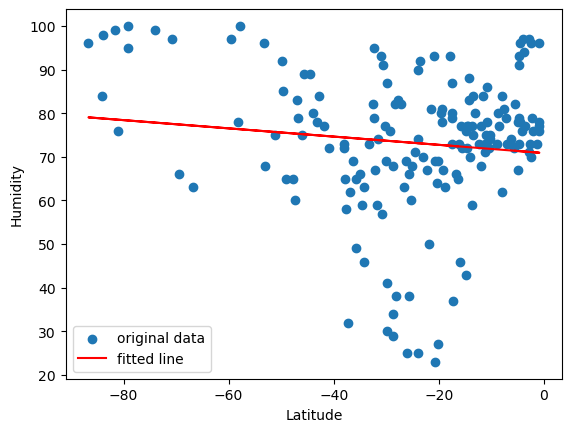

In [103]:
# Southern Hemisphere
plt.ylabel("Humidity")
plt.xlabel("Latitude")
linregplt(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** Humidity goes down as latitude reaches 0

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.17777885301587273


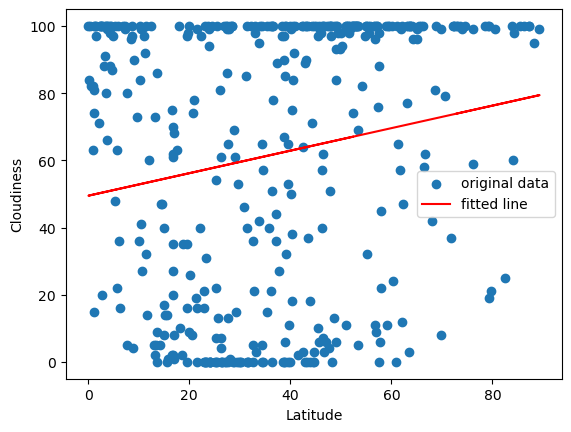

In [104]:
# Northern Hemisphere
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
linregplt(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

The r value is -0.11078335102646873


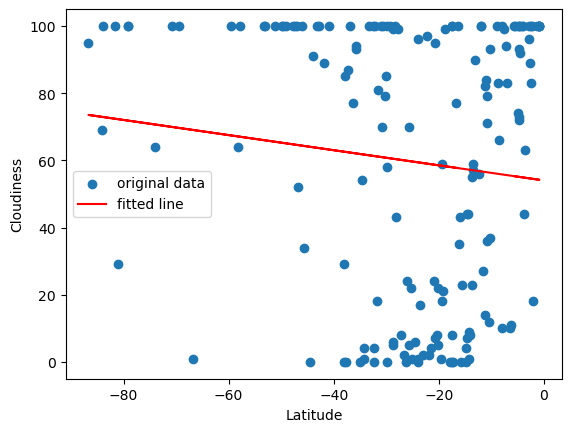

In [106]:
# Southern Hemisphere
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
linregplt(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r value is 0.07179940072061257


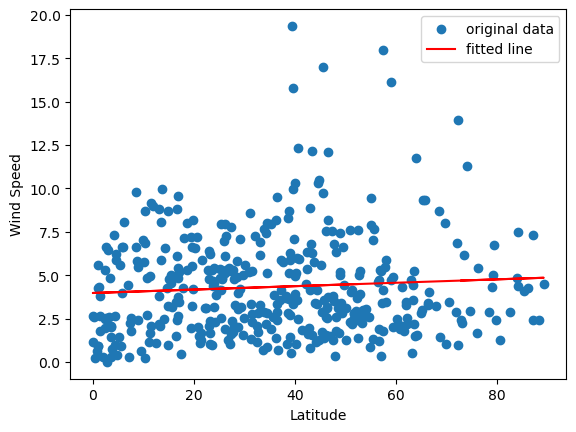

In [107]:
# Northern Hemisphere
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
linregplt(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

The r value is -0.38174891080464024


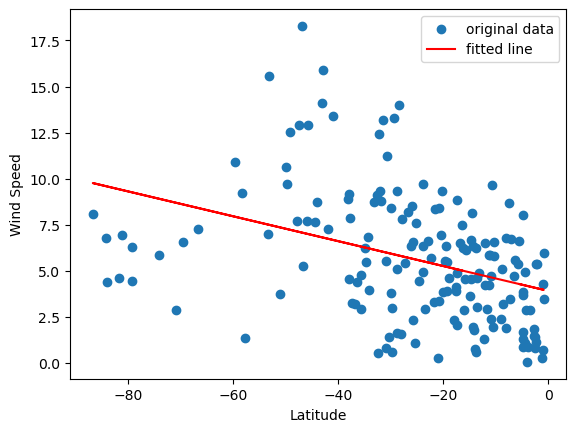

In [108]:
# Southern Hemisphere
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
linregplt(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** As latitude increases, so does wind speed